In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-localapprox-splines)=
# Cubic splines

```{index} interpolation; by piecewise polynomials
```

A piecewise linear interpolant is continuous but has discontinuities in its derivative. We often desire a smoother interpolant, i.e., one that has some continuous derivatives. By far the most popular choice is piecewise cubic.

```{index} ! cubic spline, ! spline (cubic spline)
```

::::{proof:definition} Cubic spline
A **cubic spline** is a piecewise cubic function that has two continuous derivatives everywhere. 
::::

We use $S(x)$ to denote the cubic spline interpolant. As before, suppose that distinct nodes $t_0 < t_1 < \cdots < t_n$ (not necessarily equally spaced) and data $y_0,\ldots,y_n$ are given. For any $k=1,\ldots,n$, the spline $S(x)$ on the interval $[t_{k-1},t_k]$ is by definition a cubic polynomial $S_k(x)$, which we express as

```{math}
 :label: splinepw
 S_k(x) = a_k + b_k(x-t_{k-1}) + c_k(x-t_{k-1})^2 + d_k(x-t_{k-1})^3, \qquad k=1,\ldots,n,
```

where $a_k,b_k,c_k,d_k$ are values to be determined. Overall there are $4n$ such undetermined coefficients.

## Smoothness conditions

We are able to ensure that $S$ has at least two continuous derivatives everywhere by means of the following constraints.

**1. Interpolation by $S_k$ at both of its endpoints.**

Algebraically we require $S_k(t_{k-1})=y_{k-1}$ and $S_k(t_k)=y_k$ for every $k=1,\dots,n$. In terms of {eq}`splinepw`, these conditions are

```{math}
:label: spline0a
a_k = y_{k-1},
```

```{math}
:label: spline0b
    a_k + b_k  h_k + c_k h_k^2 + d_k h_k^3 = y_{k}, \qquad k=1,\ldots,n,
```

where we have used the definition

```{math}
:label: splineh
h_k = t_{k}-t_{k-1}, \qquad k=1,\ldots,n.
```

The values of $h_k$ are derived from the nodes. Crucially, the unknown coefficients appear only *linearly* in the constraint equations. So we will express the constraints using linear algebra. The left endpoint interpolation constraints {eq}`spline0a` are, in matrix form,

```{math}
:label: spline0asys
\begin{bmatrix}
  \mathbf{I} & \boldsymbol{0} & \boldsymbol{0} & \boldsymbol{0}
\end{bmatrix}
\begin{bmatrix}
    \mathbf{a} \\ \mathbf{b} \\ \mathbf{c} \\ \mathbf{d}
\end{bmatrix}
=
  \begin{bmatrix}
  y_0 \\ \vdots \\ y_{n-1}
\end{bmatrix},
```

with $\mathbf{I}$ being an $n\times n$ identity. The right endpoint interpolation constraints, given by {eq}`spline0b`, become

```{math}
:label: spline0bsys
\begin{bmatrix}
  \mathbf{I} & \mathbf{H} & \mathbf{H}^2 & \mathbf{H}^3
\end{bmatrix}
\begin{bmatrix}
  \mathbf{a} \\ \mathbf{b} \\ \mathbf{c} \\ \mathbf{d}
\end{bmatrix}
  =
\begin{bmatrix}
  y_1 \\ \vdots \\ y_{n}
\end{bmatrix},
```

where we have defined the diagonal matrix

```{math}
:label: splinehsys
\mathbf{H}  =
\begin{bmatrix}
  h_1 & & & \\ & h_2 & & \\ & & \ddots & \\ & & & h_n
\end{bmatrix}.
```

Collectively, {eq}`spline0asys` and {eq}`spline0bsys` express $2n$ scalar constraints on the unknowns.

**2. Continuity of $S'(x)$ at interior nodes.**

We do not know what the slope of the interpolant should be at the nodes, but we do want the same slope whether a node is approached from the left or the right. Thus we obtain constraints at the nodes that sit between two neighboring piecewise definitions, so that $S_1'(t_1)=S_2'(t_1)$, and so on. Altogether these are

```{math}
:label: spline1
b_k + 2 c_k h_k + 3 d_k h_k^2 = b_{k+1}, \qquad k=1,\dots,n-1.
```

Moving the unknowns to the left side, as a system these become

```{math}
:label: spline1sys
\mathbf{E}
\begin{bmatrix}
  \boldsymbol{0} & \mathbf{J} & 2\mathbf{H} & 3\mathbf{H}^2
\end{bmatrix}
\begin{bmatrix}
  \mathbf{a} \\ \mathbf{b} \\ \mathbf{c} \\ \mathbf{d}
  \end{bmatrix}
= \boldsymbol{0},
```

where now we have defined

```{math}
:label: splineJ
\mathbf{J} =
\begin{bmatrix}
  1  & -1 & & & \\ & 1 & -1 & & \\ & & \ddots & \ddots & \\ & & &1 & -1 \\ & & & & 1
\end{bmatrix},
```

and $\mathbf{E}$ is the $(n-1)\times n$ matrix resulting from deleting the last row of the identity:

```{math}
:label: splineE
\mathbf{E} =
\begin{bmatrix}
  1  & 0 & & & \\ & 1 & 0 & & \\ & & \ddots & \ddots & \\ & & & 1&  0
\end{bmatrix}.
```

Left-multiplying by $\mathbf{E}$ deletes the last row of any matrix or vector. Hence {eq}`spline1sys` represents $n-1$ constraints on the unknowns. (Remember, there are only $n-1$ interior nodes.)

**3. Continuity of $S''(x)$ at interior nodes.**

These again apply only at the interior nodes $t_1,\dots,t_{n-1}$, in the form $S_1''(t_1)=S_2''(t_1)$ and so on. Using {eq}`splinepw` once more, we obtain

```{math}
:label: spline2
  2 c_k + 6 d_k h_k = 2c_{k+1}, \qquad k=1,\dots,n-1.
```

In system form (after canceling a factor of 2 from each side) we get

```{math}
:label: spline2sys
\mathbf{E}
\begin{bmatrix}
\boldsymbol{0} & \boldsymbol{0} & \mathbf{J} & 3\mathbf{H}
\end{bmatrix}
\begin{bmatrix}
\mathbf{a} \\ \mathbf{b} \\ \mathbf{c} \\ \mathbf{d}
\end{bmatrix}
= \boldsymbol{0}.
```

## End conditions

So far the equations {eq}`spline0asys`,  {eq}`spline0bsys`,  {eq}`spline1sys`, and {eq}`spline2sys` form $2n+(n-1)+(n-1)=4n-2$ linear conditions on the $4n$ unknowns in the piecewise definition {eq}`splinepw`. In order to obtain a square system, we must add two more constraints. If the application prescribes values for $S'$ or $S''$ at the endpoints, those may be applied. Otherwise there are two major alternatives:

- **Natural spline:** $\quad S_1''(t_0)=S_n''(t_n)=0$
- **Not-a-knot spline:** $\quad S_1'''(t_1)=S_2'''(t_1), \;  S_{n-1}'''(t_{n-1})=S_n'''(t_{n-1})$

While natural splines have important theoretical properties, not-a-knot splines give better pointwise accuracy, and they are the only type we consider further.

In the not-a-knot spline, the values and first three derivatives of the cubic polynomials $S_1$ and $S_2$ agree at the node $t_1$. Hence they must be the same cubic polynomial! The same is true of $S_{n-1}$ and $S_n$.[^nak] We could use these facts to eliminate some of the undetermined coefficients from our linear system of constraints. However, rather than rework the algebra we just append two more rows to the system, expressing the conditions

[^nak]: This explains the name of the not-a-knot spline—for splines, "knots" are the points at which  different piecewise definitions meet.

```{math}
:label: splinenak
d_1=d_2, \quad  d_{n-1}=d_n.
```

Collectively, {eq}`spline0asys`,  {eq}`spline0bsys`,  {eq}`spline1sys`,  {eq}`spline2sys`, and {eq}`splinenak` comprise a square linear system of size $4n$ which can be solved for the coefficients defining the piecewise cubics in {eq}`splinepw`. This is a major difference from the piecewise linear interpolant, for which there is no linear system to solve. Indeed, while it is possible to find a basis for the cubic spline interpolant analogous to the hat functions, it is not possible in closed form to construct a *cardinal* basis, so the solution of a linear system cannot be avoided.

## Implementation

(function-spinterp)=

````{proof:function} spinterp
**Cubic not-a-knot spline interpolation**

```{code-block} julia1
:lineno-start: 1
"""
    spinterp(t,y)

Construct a cubic not-a-knot spline interpolating function for data
values in `y` given at nodes in `t`.
"""
function spinterp(t,y)
    n = length(t)-1
    h = [ t[k+1]-t[k] for k in 1:n ]

    # Preliminary definitions.
    Z = zeros(n,n);
    In = I(n);  E = In[1:n-1,:];
    J = diagm(0=>ones(n),1=>-ones(n-1))
    H = diagm(0=>h)

    # Left endpoint interpolation:
    AL = [ In Z Z Z ]
    vL = y[1:n]

    # Right endpoint interpolation:
    AR = [ In H H^2 H^3 ];
    vR = y[2:n+1]

    # Continuity of first derivative:
    A1 = E*[ Z J 2*H 3*H^2 ]
    v1 = zeros(n-1)

    # Continuity of second derivative:
    A2 = E*[ Z Z J 3*H ]
    v2 = zeros(n-1)

    # Not-a-knot conditions:
    nakL = [ zeros(1,3*n) [1 -1 zeros(1,n-2)] ]
    nakR = [ zeros(1,3*n) [zeros(1,n-2) 1 -1] ]

    # Assemble and solve the full system.
    A = [ AL; AR; A1; A2; nakL; nakR ]
    v = [ vL; vR; v1; v2; 0; 0 ]
    z = A\v

    # Break the coefficients into separate vectors.
    rows = 1:n
    a = z[rows]
    b = z[n.+rows];  c = z[2*n.+rows];  d = z[3*n.+rows]
    S = [ Polynomial([a[k],b[k],c[k],d[k]]) for k in 1:n ]

    # This function evaluates the spline when called with a value
    # for x.
    return function (x)
        if x < t[1] || x > t[n+1]    # outside the interval
            return NaN
        elseif x==t[1]
            return y[1]
        else
            k = findlast(x .> t)    # last node to the left of x
            return S[k](x-t[k])
        end
    end
end
```
````

{numref}`Function {number} <function-spinterp>` gives an implementation of cubic not-a-knot spline interpolation. For clarity it stays very close to the description given above. There are some possible shortcuts—for example, one could avoid using $\mathbf{E}$ and instead directly delete the last row of any matrix it left-multiplies. Observe that the linear system is assembled and solved just once, and the returned evaluation function simply uses the resulting coefficients. This allows us to make multiple calls to evaluate $S$ without unnecessarily repeating the linear algebra.

## Conditioning and convergence

(demo-splines-splines)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

For illustration, here is a spline interpolant using just a few nodes.

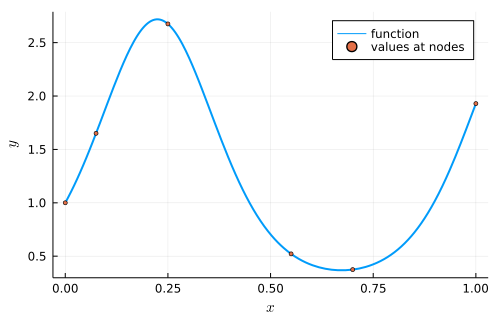

In [2]:
f = x -> exp(sin(7*x))

plot(f,0,1,label="function",xlabel=L"x",ylabel=L"y")

t = [0, 0.075, 0.25, 0.55, 0.7, 1]  # nodes
y = f.(t)                           # values at nodes

scatter!(t,y,label="values at nodes")

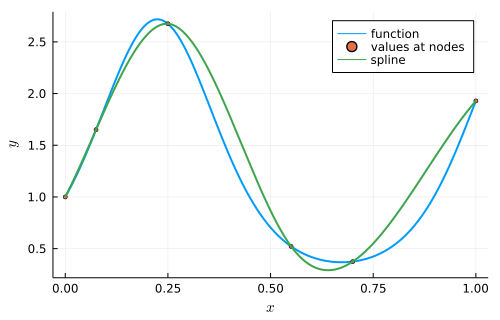

In [3]:
S = FNC.spinterp(t,y)

plot!(S,0,1,label="spline")

Now we look at the convergence rate as the number of nodes increases.

In [4]:
x = (0:10000)/1e4              # sample the difference at many points
n = @. round(Int,2^(3:0.5:7))  # numbers of nodes
err = zeros(0)
for n in n
    t = (0:n)/n 
    S = FNC.spinterp(t,f.(t))
    dif = @. f(x)-S(x)
    push!(err,norm(dif,Inf))
end

pretty_table((n=n,error=err),nosubheader=true)

┌─────┬─────────────┐
│   n │       error │
├─────┼─────────────┤
│   8 │   0.0305634 │
│  11 │   0.0207562 │
│  16 │  0.00590761 │
│  23 │  0.00134587 │
│  32 │ 0.000367049 │
│  45 │  9.17785e-5 │
│  64 │  2.15306e-5 │
│  91 │  5.04292e-6 │
│ 128 │  1.24012e-6 │
└─────┴─────────────┘


Since we expect convergence that is $O(h^4)=O(n^{-4})$, we use a log-log graph of error and expect a straight line of slope $-4$.

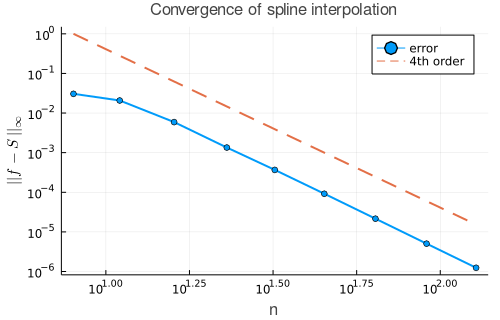

In [5]:
order4 = @. (n/n[1])^(-4)

plot(n,[err order4],m=[:o :none],l=[:solid :dash],
    label=["error" "4th order"],
    xaxis=(:log10,"n"), yaxis=(:log10,L"|| f-S\,||_\infty"),
    title="Convergence of spline interpolation")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

Besides having more smoothness than a piecewise linear interpolant, the not-a-knot cubic spline improves the order of accuracy to 4.

````{proof:theorem}
 Suppose that $f(x)$ has four continuous derivatives in $[a,b]$ (i.e., $f\in C^4[a,b]$). Let $S_n(x)$ be the not-a-knot cubic spline interpolant of $\bigl(t_i,f(t_i)\bigr)$ for $i=0,\ldots,n$, where $t_i=a+i h$ and $h=(b-a)/n$. Then for all sufficiently small $h$, there is a constant $C>0$ such that

```{math}
:label: nakaccuracy
\bigl\| f - S_n \bigr\|_\infty \le Ch^4.
```
````

The conditioning of spline interpolation is much more complicated than for the piecewise linear case. First, the fact that the coefficients of all the cubics must be solved for simultaneously implies that each data value in $\mathbf{y}$ has an influence on $S$ over the entire interval. Second, $S$ can take on values larger in magnitude than all of the values in $\mathbf{y}$ (see [Exercise 5](problem-splines-overshoot)). The details may be found in more advanced texts.

## Exercises

(problem-splinesystems)=

1. ✍ In each case, write out the entries of the matrix and right-hand side of the linear system that determines the coefficients for the cubic not-a-knot spline interpolant of the given function and node vector.

    **(a)** $\cos  (\pi^2 x^2 ), \: \mathbf{t} = [-1,1,4]$

    **(b)** $\cos (\pi^2 x^2), \: \mathbf{t} = [0,\tfrac{1}{2},\tfrac{3}{4},1]$

    **(c)** $\ln(x), \:  \mathbf{t} = [1,2,3]$

    **(d)** $\sin(x^2),\:  \mathbf{t} = [-1,0,1]$

    ````{only} solutions
    ````

2. ⌨ (continuation) For each case in the preceding problem, use Julia to solve the linear system you wrote down. Then plot the resulting cubic spline over the interval between the second and third nodes.

    (problem-spinterp)=
3. ⌨ For each given function, interval, and value of $n$, define $n+1$ evenly spaced nodes. Then use {numref}`Function {number} <function-spinterp>` to plot the cubic spline interpolant using those nodes, together with the original function over the given interval.

    **(a)** $\cos(\pi x^2)$ on $[0,4]$, $n=18$

    **(b)** $\ln(x)$ on $[1,20]$, $n=4$

    **(c)** $\sin\left(\frac{1}{x}\right)$ on $\left[\frac{1}{2},7\right]$, $n=9$

4. ⌨ For each given function and interval, perform piecewise linear interpolation using {numref}`Function {number} <function-spinterp>` for $n+1$ equispaced nodes with $n=10,20,40,80,160,320$. For each $n$, estimate the error

    ```{math}
    E(n) = \| f-p \|_\infty = \max_x | f(x) - p(x) |
    ```

    by evaluating the function and interpolant at 1600 points in the interval. Make a log-log plot of $E$ as a function of $n$ and add the line $E=Cn^{-4}$ for a constant $C$ of your choosing.

    **(a)** $\cos(\pi x^2)$ on $[0,4]$

    **(b)** $\ln(x)$ on $[1,20]$

    **(c)** $\sin\left(\frac{1}{x}\right)$ on $\left[\frac{1}{2},7\right]$

    (problem-splines-overshoot)=

5. ⌨  Although the cardinal cubic splines are intractable in closed form, they can be found numerically. Each cardinal spline interpolates the data from one column of an identity matrix. Define the nodes $\mathbf{t} = \bigl[0,\, 0.075,\, 0.25,\, 0.55,\, 1]$. Plot over $[0,1]$ the five cardinal functions for this node set over the interval $[0,1]$.

6. ✍ Suppose you were to define a piecewise quadratic spline that interpolates $n+1$ given values and has a continuous first derivative. Follow the derivation of this section to express all of the interpolation and continuity conditions. How many additional conditions are required to make a square system for the coefficients?

7. **(a)** ✍ If $y_0=y_n$, another possibility for cubic spline end conditions is to make $S(x)$ a periodic function. This implies that $S'$ and $S''$ are also periodic. Write out the two new algebraic equations for these constraints in terms of the piecewise coefficients.

    **(b)** ⌨ Modify {numref}`Function {number} <function-spinterp>` to compute a periodic spline interpolant. Test by making a plot of the interpolant for $f(x) =\exp(\sin(3x))$ over the interval $[0,2\pi/3]$ with equally spaced nodes and $n=8$.